In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Loading the original image

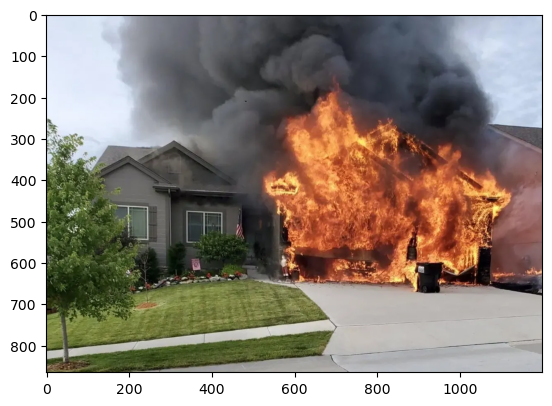

In [4]:
image = cv2.imread('firepic.png')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

## Changing the color space from BGR to HSV

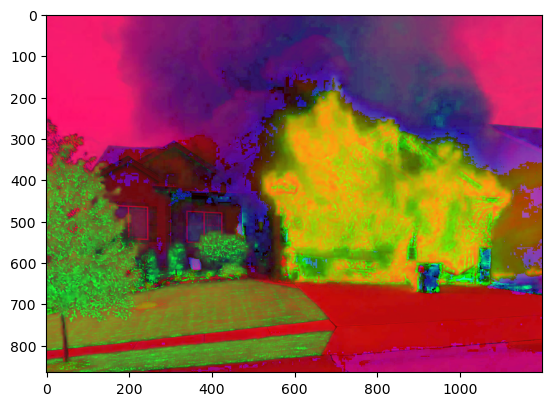

In [5]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_rgb = cv2.cvtColor(hsv, cv2.COLOR_BGR2RGB)
plt.imshow(hsv_rgb)

## Defining the range of fire color in HSV

In [6]:
fire_color_lower = np.array([5, 150, 150])
fire_color_upper = np.array([35, 255, 255])

## Applying binarization mask on the image

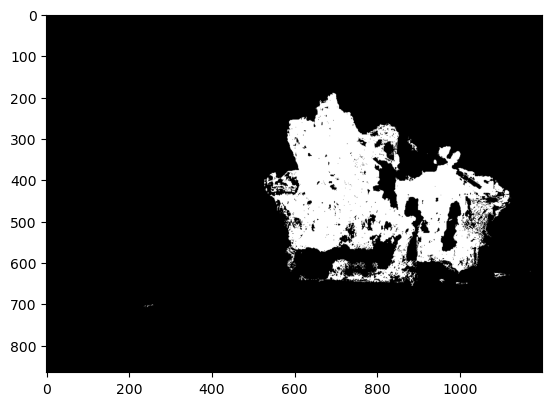

In [7]:
mask = cv2.inRange(hsv, fire_color_lower, fire_color_upper)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)

## Applying morphologic opening ( `Erosion` followed by `Dilatation` )

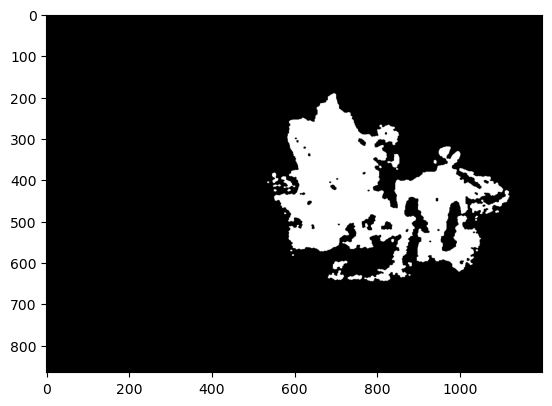

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(mask_rgb)

## Defining fire contours

In [10]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

## Drawing a box arround the fire

In [11]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    rect_param = ((x + w), (y + h), ((x + w) + (y + h)) * 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

## Results

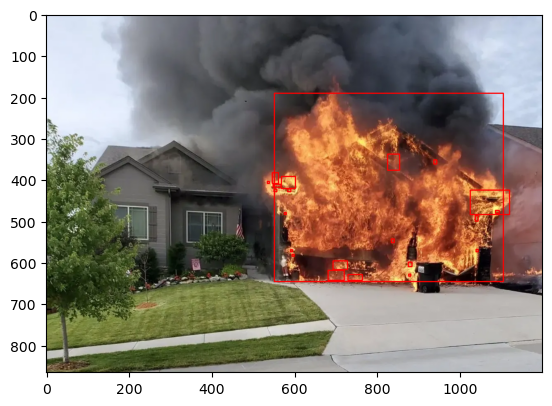

In [12]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)